In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno ## 결측치 확인
from fancyimpute import IterativeImputer ## 다중대체
import seaborn.objects as so ## seaborn의 다른 라이브러리
import warnings ## warnings message 표시 안함
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'retina' ## 선명하게 만들기

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [333]:
#working directory 확인
os.getcwd() #현재 작업 위치 출력

'c:\\Users\\서가은\\Desktop\\pre\\SeoulBike'

#### train data
- 8040행
- 결측치 : 온도(Temperature(째C)) 800개, 풍속(Wind speed (m/s)) 802개, 계절(Seasons) 802개 

#### test data
- 720행
- 결측치 : 온도(Temperature(째C)) 76개, 풍속(Wind speed (m/s)) 74개, 계절(Seasons) 74개

In [334]:
# read train data
df_train = pd.read_csv("C:\\Users\\서가은\\Desktop\\train.csv")
print(df_train.head())
print(df_train.info()) ## 8040행
print(df_train.describe())
print(df_train.isna().sum()) 

         Date  Rented Bike Count  Hour  Temperature(째C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(째C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               NaN              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0     NaN  No Holiday   


In [335]:
## read test data
df_test = pd.read_csv("C:\\Users\\서가은\\Desktop\\test.csv")
print(df_test.head())
print(df_test.info())
print(df_test.describe())
print(df_test.isna().sum())

         Date  Hour  Temperature(째C)  Humidity(%)  Wind speed (m/s)  \
0  01/11/2018     0              5.7           62               2.3   
1  01/11/2018     1              5.1           65               1.6   
2  01/11/2018     2              4.4           64               NaN   
3  01/11/2018     3              4.2           65               0.7   
4  01/11/2018     4              3.6           70               0.8   

   Visibility (10m)  Dew point temperature(째C)  Solar Radiation (MJ/m2)  \
0              1909                       -1.0                      0.0   
1              1932                       -0.9                      0.0   
2              2000                       -1.8                      0.0   
3              1962                       -1.8                      0.0   
4              1934                       -1.3                      0.0   

   Rainfall(mm)  Snowfall (cm) Seasons     Holiday Functioning Day  
0           0.0            0.0  Autumn  No Holiday   

In [336]:
print(df_test['Functioning Day'].unique()) ## 운영일 : Yes, no로 나타남
print(df_test['Holiday'].unique()) ## 공휴일 : Holiday, No Holiday 로 나타남
print(df_test['Hour'].unique()) ## 0시부터 23시까지 하루 시간을 24시간의 형태로 나타냄
print(df_test['Seasons'].unique()) ## 봄, 여름, 가을, 겨울 그리고 결측값

['Yes' 'No']
['No Holiday']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
['Autumn' nan]


### train data set과 test data set 전처리
- 결측치 처리 방법은 과제3에서 했던 방법과 동일

#### 결측치 처리

In [337]:
df_train1 = df_train.copy()
df_train1.isna().sum()

Date                           0
Rented Bike Count              0
Hour                           0
Temperature(째C)              800
Humidity(%)                    0
Wind speed (m/s)             802
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Seasons                      802
Holiday                        0
Functioning Day                0
dtype: int64

In [338]:
df_test1 = df_test.copy()
df_test1.isna().sum()

Date                          0
Hour                          0
Temperature(째C)              76
Humidity(%)                   0
Wind speed (m/s)             74
Visibility (10m)              0
Dew point temperature(째C)     0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Seasons                      74
Holiday                       0
Functioning Day               0
dtype: int64

##### Temperature 변수 결측치
- 이전행과 이후행의 평균값으로 결측값 대체

In [339]:
## train1 set temperature 결측치 처리
for i in range(len(df_train1['Temperature(째C)'])):
    if pd.isnull(df_train1['Temperature(째C)'][i]):
        # 이전값 찾기
        j = i - 1
        while pd.isnull(df_train1['Temperature(째C)'][j]):
            j -= 1
        prev_value = df_train1['Temperature(째C)'][j]
        
        # 이후값 찾기
        k = i + 1
        while pd.isnull(df_train1['Temperature(째C)'][k]):
            k += 1
        next_value = df_train1['Temperature(째C)'][k]
        
        # 이전값과 이후값의 평균값으로 대체
        avg_value = (prev_value + next_value) / 2
        df_train1['Temperature(째C)'][i] = avg_value
        
print(f'대체 전 : {df_train["Temperature(째C)"].isna().sum()}')
print(f'대체 후 : {df_train1["Temperature(째C)"].isna().sum()}') 

print(df_train1['Temperature(째C)'].mean())
print(df_train1['Temperature(째C)'].isna().sum()) ## 대체 완료 확인

대체 전 : 800
대체 후 : 0
13.338463930348258
0


In [340]:
## test1 set temperature 결측치 처리
for i in range(len(df_test1['Temperature(째C)'])):
    if pd.isnull(df_test1['Temperature(째C)'][i]):
        # 이전값 찾기
        j = i - 1
        while pd.isnull(df_test1['Temperature(째C)'][j]):
            j -= 1
        prev_value = df_test1['Temperature(째C)'][j]
        
        # 이후값 찾기
        k = i + 1
        while pd.isnull(df_test1['Temperature(째C)'][k]):
            k += 1
        next_value = df_test1['Temperature(째C)'][k]
        
        # 이전값과 이후값의 평균값으로 대체
        avg_value = (prev_value + next_value) / 2
        df_test1['Temperature(째C)'][i] = avg_value
        
print(f'대체 전 : {df_test["Temperature(째C)"].isna().sum()}')
print(f'대체 후 : {df_test1["Temperature(째C)"].isna().sum()}') 

print(df_test1['Temperature(째C)'].mean())
print(df_test1['Temperature(째C)'].isna().sum()) ## 대체 완료 확인

대체 전 : 76
대체 후 : 0
7.807743055555555
0


##### Wind Speed 변수 결측치
- 온도 변수 결측치 해결 방법과 동일하게 실시

In [341]:
## train1 set wind speed 결측치 처리
for i in range(len(df_train1['Wind speed (m/s)'])):
    if pd.isnull(df_train1['Wind speed (m/s)'][i]):
        # 이전값 찾기
        j = i - 1
        while pd.isnull(df_train1['Wind speed (m/s)'][j]):
            j -= 1
        prev_value = df_train1['Wind speed (m/s)'][j]
        
        # 이후값 찾기
        k = i + 1
        while pd.isnull(df_train1['Wind speed (m/s)'][k]):
            k += 1
        next_value = df_train1['Wind speed (m/s)'][k]
        
        # 이전값과 이후값의 평균값으로 대체
        avg_value = (prev_value + next_value) / 2
        df_train1['Wind speed (m/s)'][i] = avg_value

print(f'대체 전 : {df_train["Wind speed (m/s)"].isna().sum()}')
print(f'대체 후 : {df_train1["Wind speed (m/s)"].isna().sum()}') 

print(df_train1['Wind speed (m/s)'].mean())
print(df_train1['Wind speed (m/s)'].isna().sum()) ## 대체 완료 확인

대체 전 : 802
대체 후 : 0
1.7514396766169156
0


In [342]:
## test1 set wind speed 결측치 처리
for i in range(len(df_test1['Wind speed (m/s)'])):
    if pd.isnull(df_test1['Wind speed (m/s)'][i]):
        # 이전값 찾기
        j = i - 1
        while pd.isnull(df_test1['Wind speed (m/s)'][j]):
            j -= 1
        prev_value = df_test1['Wind speed (m/s)'][j]
        
        # 이후값 찾기
        k = i + 1
        while pd.isnull(df_test1['Wind speed (m/s)'][k]):
            k += 1
        next_value = df_test1['Wind speed (m/s)'][k]
        
        # 이전값과 이후값의 평균값으로 대체
        avg_value = (prev_value + next_value) / 2
        df_test1['Wind speed (m/s)'][i] = avg_value

print(f'대체 전 : {df_test["Wind speed (m/s)"].isna().sum()}')
print(f'대체 후 : {df_test1["Wind speed (m/s)"].isna().sum()}') 

print(df_test1['Wind speed (m/s)'].mean())
print(df_test1['Wind speed (m/s)'].isna().sum()) ## 대체 완료 확인

대체 전 : 74
대체 후 : 0
1.385138888888889
0


##### Seasons 변수 결측치
- 온도와 풍속 변수에 대해 전처리 한 방법과 유사하게 실시
- 앞뒤 행이 같으면 해당 계절을 삽입, 다르면 날짜 확인해봐야함

In [343]:
## train1 data set Seasons 결측치 처리
for i in range(len(df_train1['Seasons'])):
    if pd.isnull(df_train1['Seasons'][i]):
        # 이전값 찾기
        j = i - 1
        while j >= 0 and pd.isnull(df_train1['Seasons'][j]):
            j -= 1
        prev_value = df_train1['Seasons'][j] if j >= 0 else None
        
        # 이후값 찾기
        k = i + 1
        while k < len(df_train1['Seasons']) and pd.isnull(df_train1['Seasons'][k]):
            k += 1
        next_value = df_train1['Seasons'][k] if k < len(df_train1['Seasons']) else None
        
        # 이전값과 이후값이 같은 경우 해당 값을 대체하고, 다를 경우 결측값 유지
        if prev_value is not None and next_value is not None and prev_value == next_value:
            df_train1['Seasons'][i] = prev_value
            
print(f'대체 전 : {df_train["Seasons"].isna().sum()}')
print(f'대체 후 : {df_train1["Seasons"].isna().sum()}') 

print(df_train1['Seasons'].isna()) ## 첫번째 행 계절 결측치 임을 알 수 있음

대체 전 : 802
대체 후 : 1
0        True
1       False
2       False
3       False
4       False
        ...  
8035    False
8036    False
8037    False
8038    False
8039    False
Name: Seasons, Length: 8040, dtype: bool


In [344]:
## 계절에 대한 결측값 하나가 처리되지 않았음
## 첫번째 행에서 결측값 발생하므로 '겨울'로 처리

df_train1['Seasons'].fillna('Winter',  inplace=True)
print(df_train1['Seasons'].isna().sum()) ## 대체 완료 확인

0


In [345]:
## test1 data set Seasons 결측치 처리
for i in range(len(df_test1['Seasons'])):
    if pd.isnull(df_test1['Seasons'][i]):
        # 이전값 찾기
        j = i - 1
        while j >= 0 and pd.isnull(df_test1['Seasons'][j]):
            j -= 1
        prev_value = df_test1['Seasons'][j] if j >= 0 else None
        
        # 이후값 찾기
        k = i + 1
        while k < len(df_test1['Seasons']) and pd.isnull(df_test1['Seasons'][k]):
            k += 1
        next_value = df_test1['Seasons'][k] if k < len(df_test1['Seasons']) else None
        
        # 이전값과 이후값이 같은 경우 해당 값을 대체하고, 다를 경우 결측값 유지
        if prev_value is not None and next_value is not None and prev_value == next_value:
            df_test1['Seasons'][i] = prev_value
            
print(f'대체 전 : {df_test["Seasons"].isna().sum()}')
print(f'대체 후 : {df_test1["Seasons"].isna().sum()}') 

print(df_test1['Seasons'].isna()) ## 첫번째 행 계절 결측치 임을 알 수 있음

대체 전 : 74
대체 후 : 0
0      False
1      False
2      False
3      False
4      False
       ...  
715    False
716    False
717    False
718    False
719    False
Name: Seasons, Length: 720, dtype: bool


In [346]:
## train1 data set의 모든 결측치 처리 완료
df_train1.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [347]:
## test1 data set의 모든 결측치 처리 완료
df_test1.isna().sum()

Date                         0
Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#### 이상치확인
- 이상치는


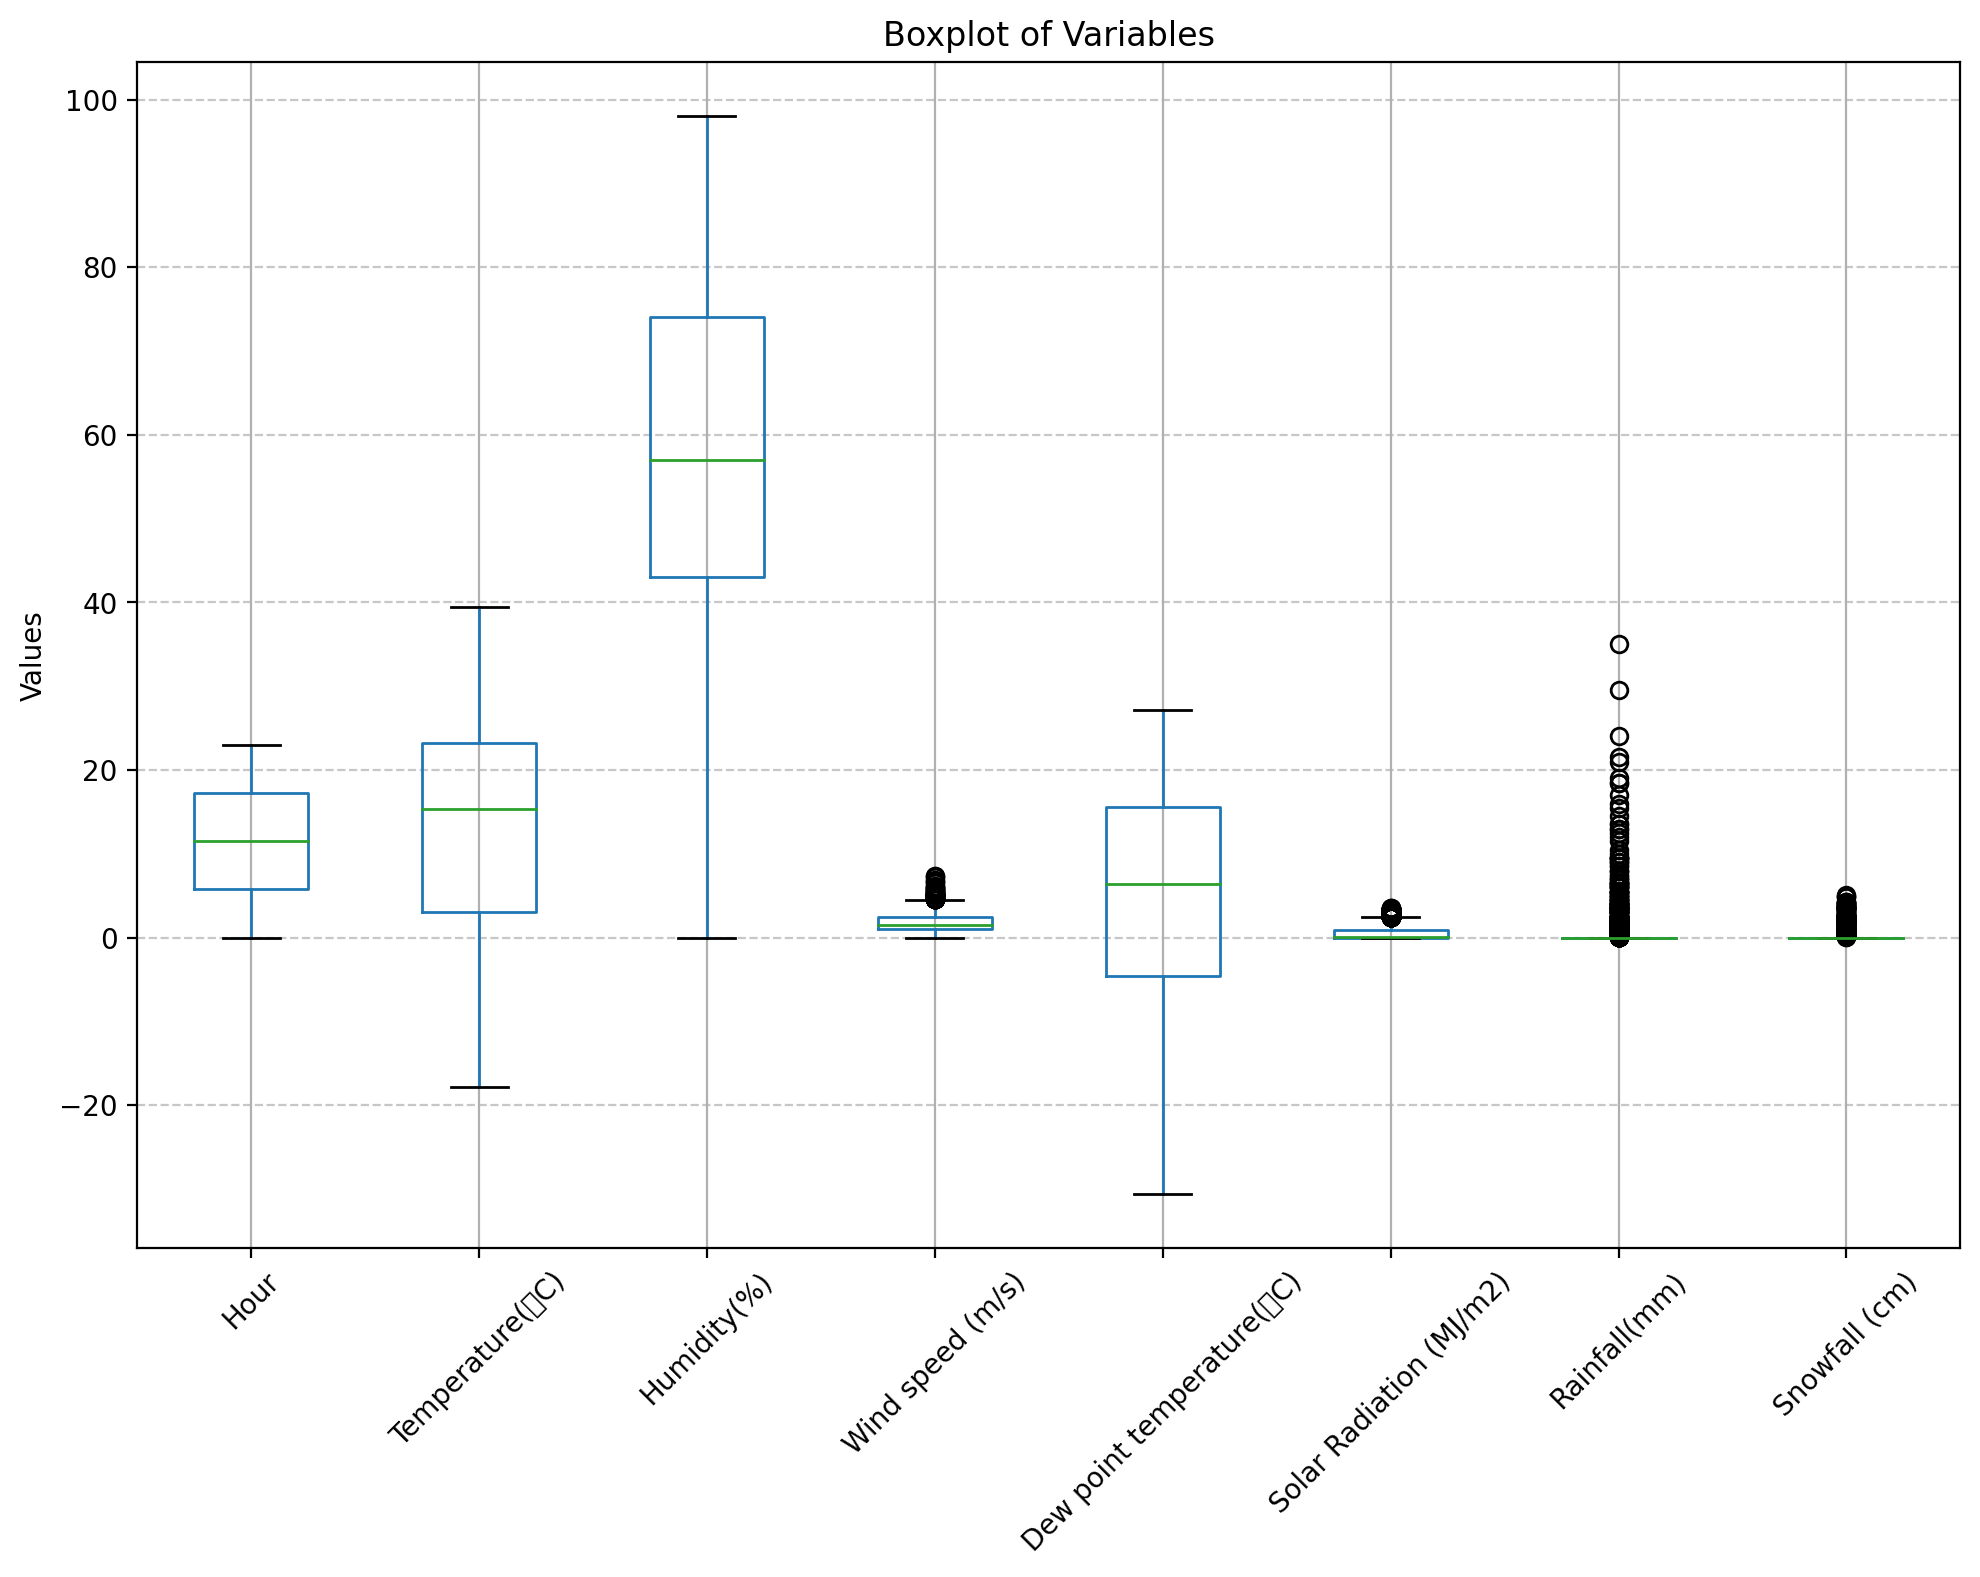

In [348]:
## train1 모든 변수에 대해 boxplot 확인 후 이상치 확인
df_train1_subset = df_train1.drop(columns=['Rented Bike Count', 'Visibility (10m)'])
## 'Rented Bike Count', 'Visibility (10m)' 이 세 변수를 포함해 Boxplot 그리면 잘 안보임

plt.figure(figsize=(10,8))
df_train1_subset.boxplot()
plt.title('Boxplot of Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

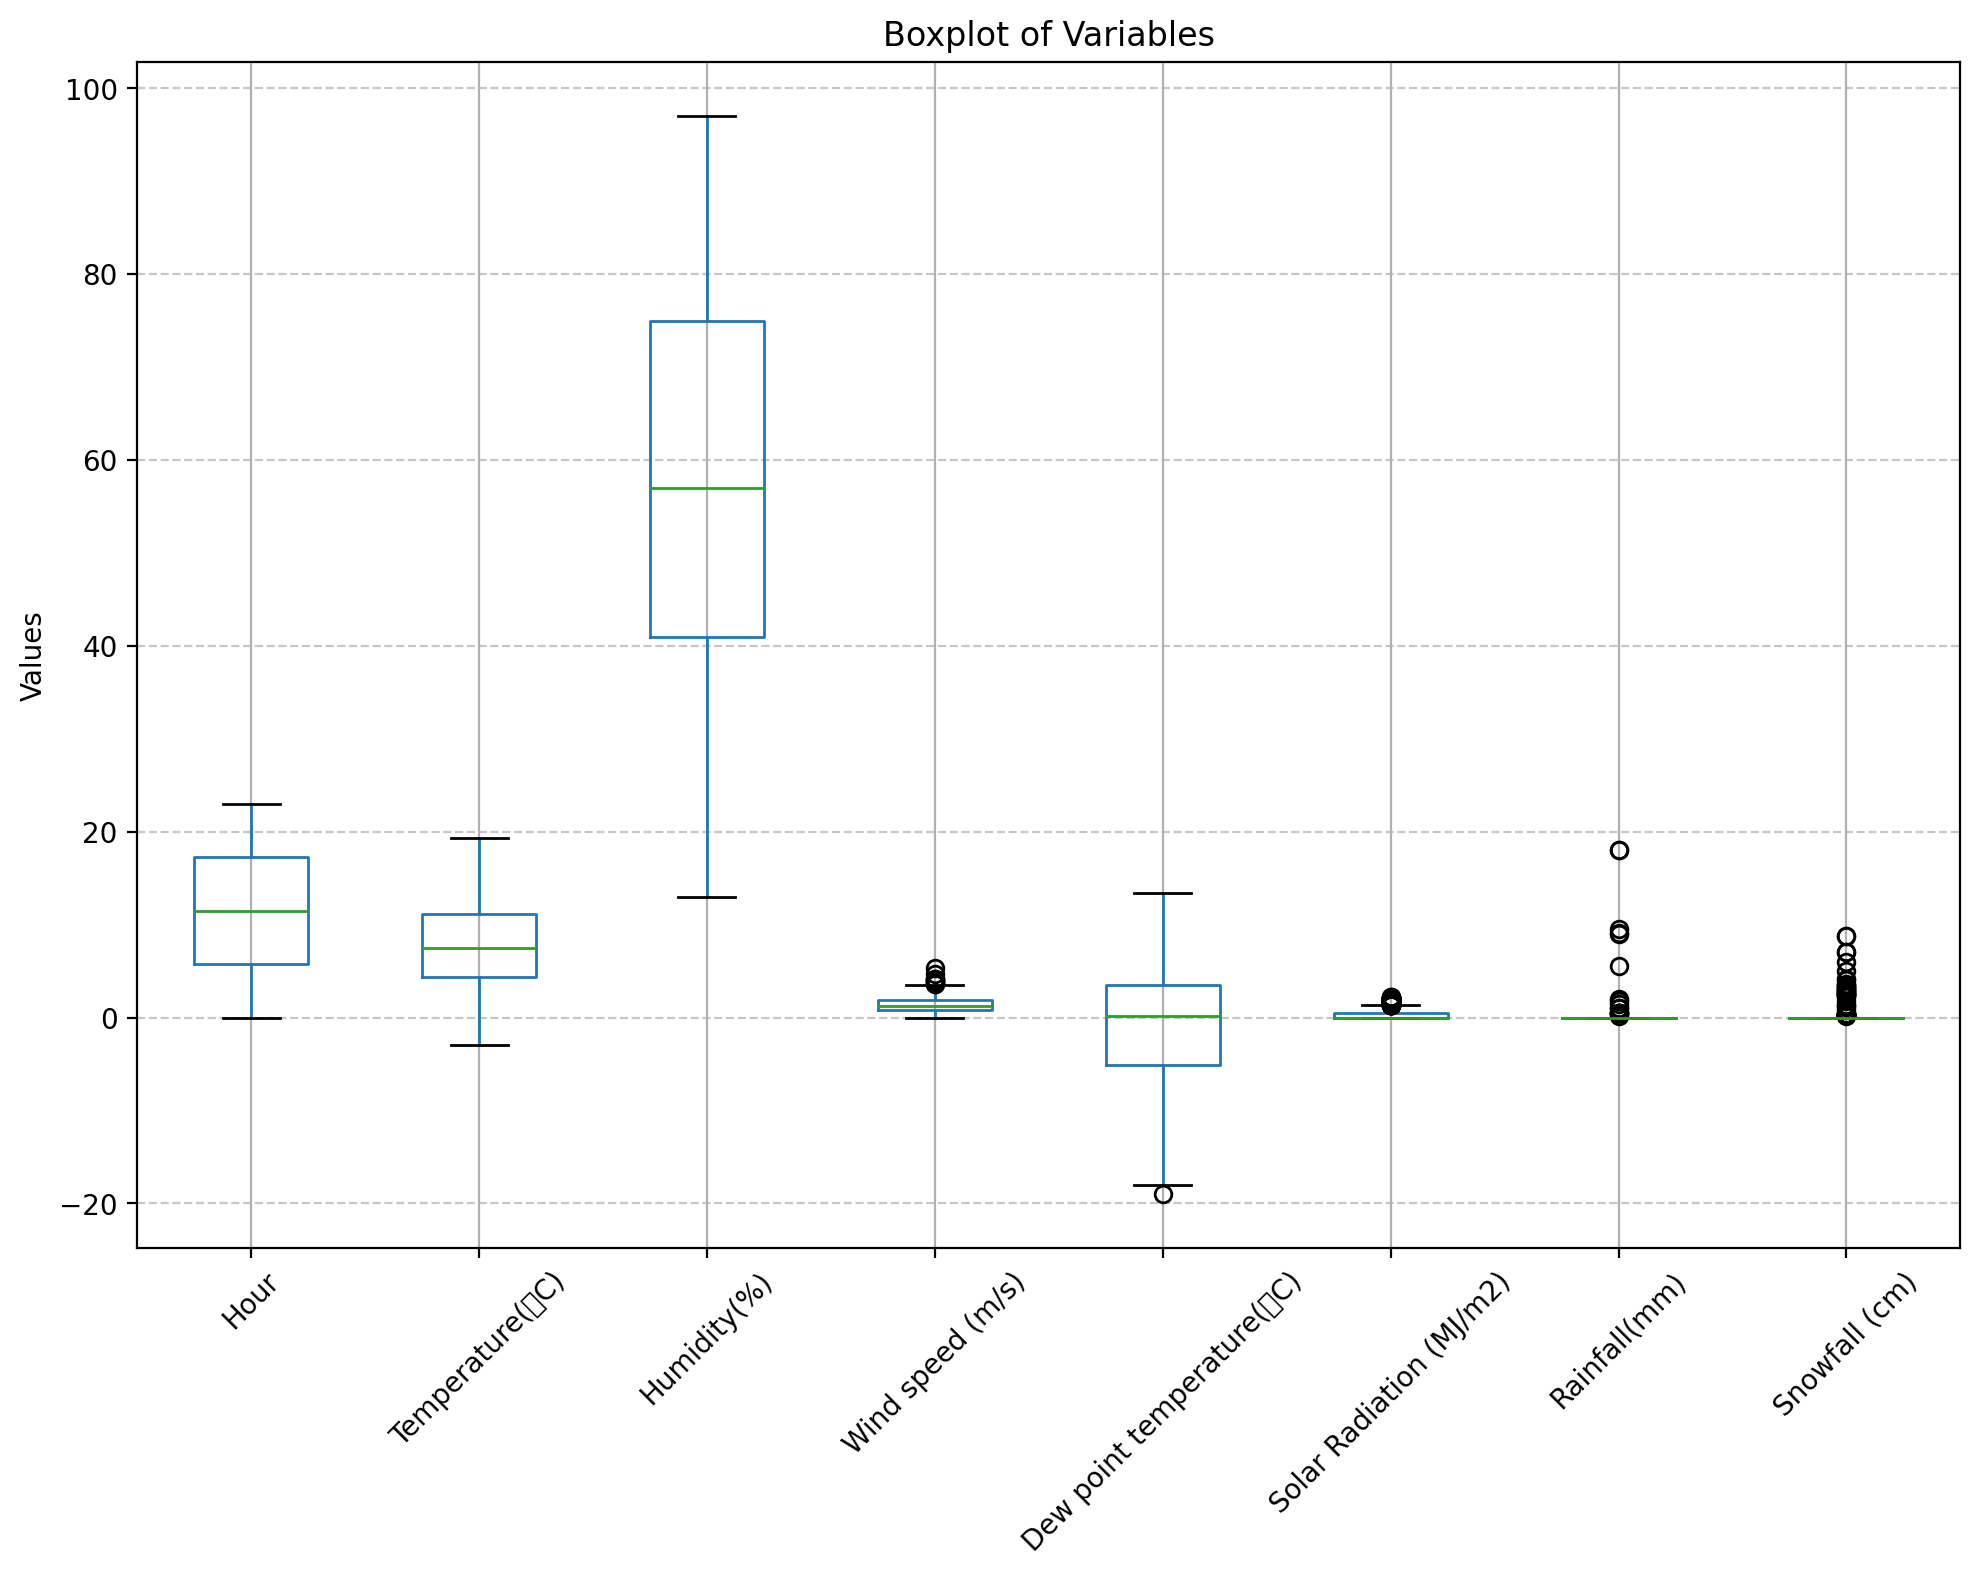

In [349]:
## test1 모든 변수에 대해 boxplot 확인 후 이상치 확인
df_teat1_subset = df_test1.drop(columns=['Visibility (10m)'])
## 'Rented Bike Count', 'Visibility (10m)' 이 세 변수를 포함해 Boxplot 그리면 잘 안보임

plt.figure(figsize=(10,8))
df_teat1_subset.boxplot()
plt.title('Boxplot of Variables')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

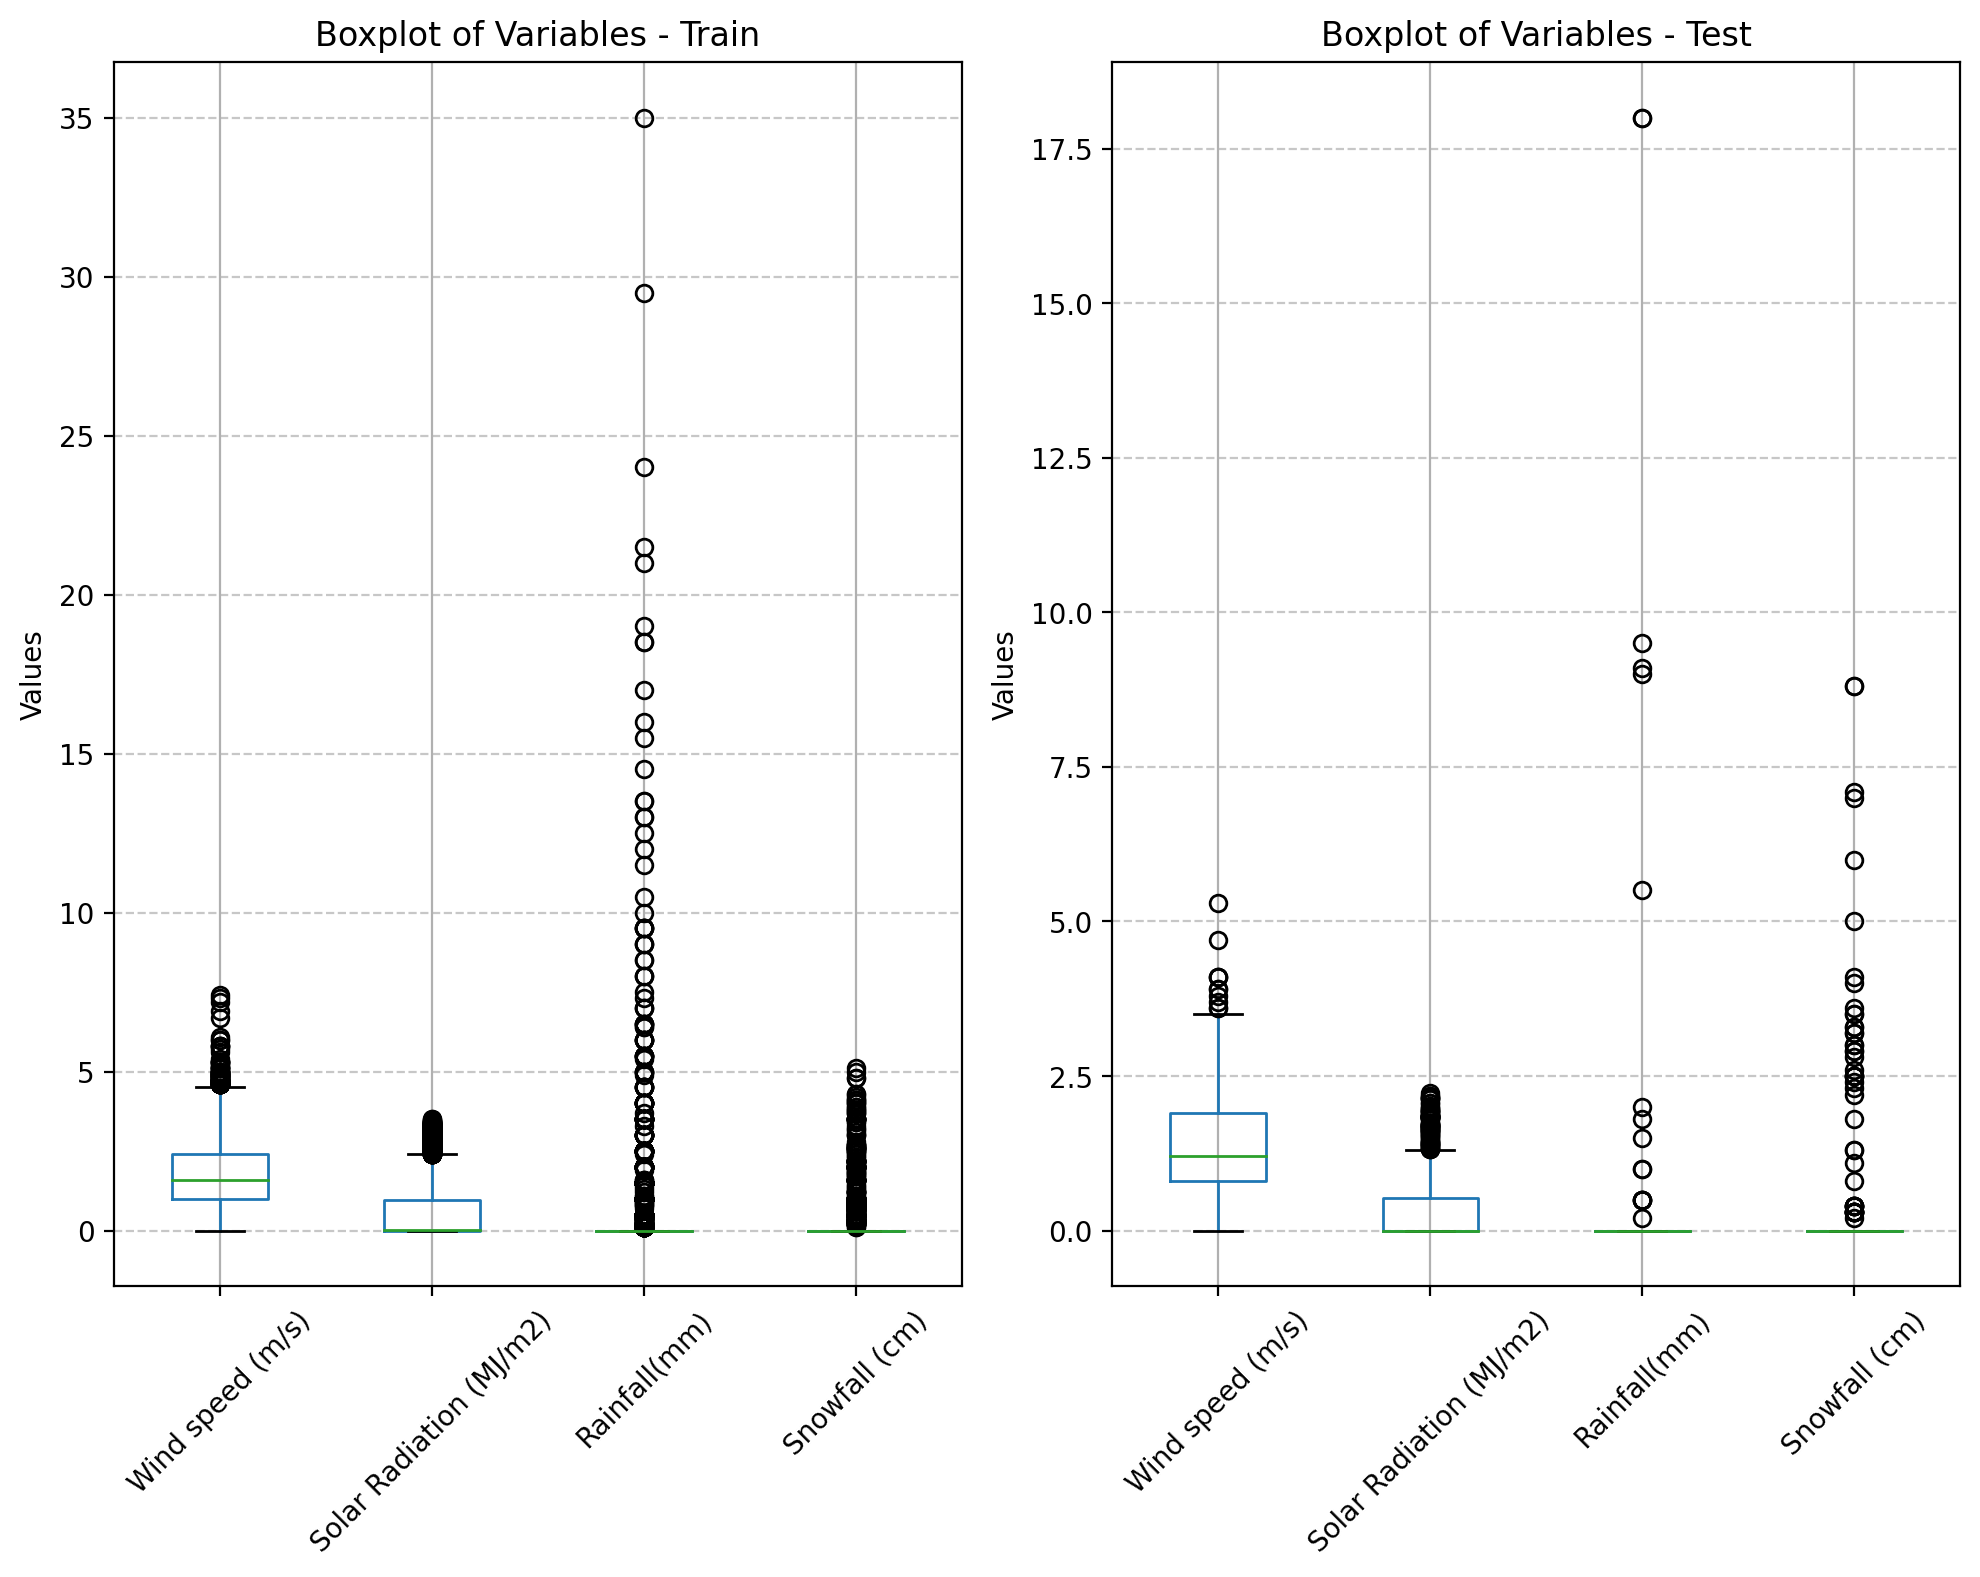

In [350]:
# train 데이터셋에서 필요한 열만 선택
df_train1_subset = df_train[['Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']]

# test 데이터셋에서 필요한 열만 선택
df_test1_subset = df_test[['Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']]

# Boxplot 그리기
plt.figure(figsize=(10, 8))

# train 데이터셋에 대한 Boxplot
plt.subplot(1, 2, 1)
df_train1_subset.boxplot()
plt.title('Boxplot of Variables - Train')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# test 데이터셋에 대한 Boxplot
plt.subplot(1, 2, 2)
df_test1_subset.boxplot()
plt.title('Boxplot of Variables - Test')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [351]:
## 풍속을 제외한 나머지 데이터에서는 outlier가 존재함
## 태양복사량은 해가 떠있는 시점에만 계산하기 때문에 이상치 나올 수 있음
## 눈, 비의 경우 오는날로만 계산해야 하고, 장마나 폭설등의 이유로 이상치 나올 수 있음

##### 풍속 데이터의 이상치 확인
- 기상청에 근거하면 서울의 연평균 풍속은 2.3m/s 이며
 9월에 1.9정도로 가장 낮고, 4월에 2.7m정도로 가장 높다고 한다.
 따라서 풍속데이터에는 이상치가 있는것으로 판단.
- 0~7 m/s 의 풍속이면 전 작업이 실시될 수 있는 안전 작업 범위에 속한다고 함
- 태풍이 올 경우 풍속이 높게 나타날 수 있기 때문에 풍속이 7이상인 행이 태풍이 올 수 있는 월인지를 확인해야 함
- 실제 날씨를 확인해 본 결과 강풍 주의인 날이 있음. 따라서 풍속 데이터에도 딱히 이상치 없음



In [352]:
# 풍속 데이터에서 7 이상의 값을 가지는 행 선택
wind_speed_gt_7 = df_train1['Wind speed (m/s)'] >= 6
selected_rows = df_train1[wind_speed_gt_7]
# 선택된 행 출력
print(selected_rows)


            Date  Rented Bike Count  Hour  Temperature(째C)  Humidity(%)  \
933   08/01/2018                146    21             0.70           77   
1309  24/01/2018                140    13           -12.00           25   
2174  01/03/2018                375    14             1.20           36   
3133  10/04/2018                967    13            21.90           34   
3134  10/04/2018                913    14            21.20           35   
3135  10/04/2018                933    15            21.40           33   
3137  10/04/2018               1004    17            20.60           39   
3138  10/04/2018               1805    18            19.70           52   
3140  10/04/2018                336    20            19.10           58   
3141  10/04/2018                133    21            17.45           70   
6316  21/08/2018                 49     4            25.30           70   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(째C)  \
933                6.7      

#### function day에 대해서 값이 0인 행 제거
- 운휴일이면 자전거 대여수 0이기 때문에 


In [353]:
# 'Functioning Day' 열에서 값이 'Yes'인 행만 선택
df_train1 = df_train1[df_train1['Functioning Day'] == 'Yes']
df_train1['Functioning Day'].unique()


array(['Yes'], dtype=object)

In [354]:
df_test1 = df_test1[df_test1['Functioning Day'] == 'Yes']
df_test1['Functioning Day'].unique()

array(['Yes'], dtype=object)

## 2차 전처리

### 범주형 데이터 수치화 (one-hot encoding)
- 명목형 데이터 : Seasons, Holiday, Functioning Day

In [355]:
df_train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7817 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7817 non-null   object 
 1   Rented Bike Count          7817 non-null   int64  
 2   Hour                       7817 non-null   int64  
 3   Temperature(째C)            7817 non-null   float64
 4   Humidity(%)                7817 non-null   int64  
 5   Wind speed (m/s)           7817 non-null   float64
 6   Visibility (10m)           7817 non-null   int64  
 7   Dew point temperature(째C)  7817 non-null   float64
 8   Solar Radiation (MJ/m2)    7817 non-null   float64
 9   Rainfall(mm)               7817 non-null   float64
 10  Snowfall (cm)              7817 non-null   float64
 11  Seasons                    7817 non-null   object 
 12  Holiday                    7817 non-null   object 
 13  Functioning Day            7817 non-null   object 
dt

#####  pd.get_dummies

In [356]:
print(df_train1['Seasons'].unique(),
      df_train1['Holiday'].unique(),
      df_train1['Functioning Day'].unique())

['Winter' 'Spring' 'Summer' 'Autumn'] ['No Holiday' 'Holiday'] ['Yes']


In [357]:
df_train1_dummies = pd.get_dummies(df_train1[['Seasons','Holiday','Functioning Day']], dtype=int)
df_train1_dummies
## 원핫인코딩 적용 안되는 이슈 발생 >> dtype 으로 해결

## 수치로 맵핑 'Winter':1, 'Spring':2, 'Summer':4, 'Autumn':3
## 여름, 가을, 봄, 겨울 순으로 대여량 높기 때문에 위와 같은 순서부여
# df_train1["Seasons"] = df_train1["Seasons"].map({'Winter':1, 'Spring':2, 'Summer':4, 'Autumn':3})
# df_train1["Seasons"] 

,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_Yes
0,0,0,0,1,0,1,1
1,0,0,0,1,0,1,1
2,0,0,0,1,0,1,1
3,0,0,0,1,0,1,1
4,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...
8035,1,0,0,0,0,1,1
8036,1,0,0,0,0,1,1
8037,1,0,0,0,0,1,1
8038,1,0,0,0,0,1,1


In [358]:
## test data set 에는 가을, 공휴일 아닌날, 운영일, 운휴일이 있음
print(df_test1['Seasons'].unique(),
      df_test1['Holiday'].unique(),
      df_test1['Functioning Day'].unique())

['Autumn'] ['No Holiday'] ['Yes']


In [359]:
df_test1_dummies = pd.get_dummies(df_test1[['Seasons','Holiday','Functioning Day']], dtype=int)
df_test1_dummies

,Seasons_Autumn,Holiday_No Holiday,Functioning Day_Yes
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
715,1,1,1
716,1,1,1
717,1,1,1
718,1,1,1


In [360]:
#더미변수들을 데이터프레임에 합침
df_train1_fin = df_train1.copy() #얉은 복사

df_train1_fin = pd.concat([df_train1, df_train1_dummies], axis=1)
df_train1_fin

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),...,Seasons,Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_Yes
0,01/12/2017,254,0,-5.2,37,2.200,2000,-17.6,0.0,0.0,...,Winter,No Holiday,Yes,0,0,0,1,0,1,1
1,01/12/2017,204,1,-5.5,38,0.800,2000,-17.6,0.0,0.0,...,Winter,No Holiday,Yes,0,0,0,1,0,1,1
2,01/12/2017,173,2,-6.0,39,1.000,2000,-17.7,0.0,0.0,...,Winter,No Holiday,Yes,0,0,0,1,0,1,1
3,01/12/2017,107,3,-6.2,40,0.900,2000,-17.6,0.0,0.0,...,Winter,No Holiday,Yes,0,0,0,1,0,1,1
4,01/12/2017,78,4,-6.0,36,1.200,2000,-18.6,0.0,0.0,...,Winter,No Holiday,Yes,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8035,31/10/2018,1507,19,8.4,53,0.975,2000,-0.6,0.0,0.0,...,Autumn,No Holiday,Yes,1,0,0,0,0,1,1
8036,31/10/2018,1176,20,7.6,59,0.700,2000,0.0,0.0,0.0,...,Autumn,No Holiday,Yes,1,0,0,0,0,1,1
8037,31/10/2018,1069,21,7.6,59,3.000,1929,0.0,0.0,0.0,...,Autumn,No Holiday,Yes,1,0,0,0,0,1,1
8038,31/10/2018,1088,22,6.8,58,2.200,1936,-0.9,0.0,0.0,...,Autumn,No Holiday,Yes,1,0,0,0,0,1,1


In [361]:
df_train1_fin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7817 entries, 0 to 8039
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7817 non-null   object 
 1   Rented Bike Count          7817 non-null   int64  
 2   Hour                       7817 non-null   int64  
 3   Temperature(째C)            7817 non-null   float64
 4   Humidity(%)                7817 non-null   int64  
 5   Wind speed (m/s)           7817 non-null   float64
 6   Visibility (10m)           7817 non-null   int64  
 7   Dew point temperature(째C)  7817 non-null   float64
 8   Solar Radiation (MJ/m2)    7817 non-null   float64
 9   Rainfall(mm)               7817 non-null   float64
 10  Snowfall (cm)              7817 non-null   float64
 11  Seasons                    7817 non-null   object 
 12  Holiday                    7817 non-null   object 
 13  Functioning Day            7817 non-null   object 
 1

In [362]:
#더미변수들을 데이터프레임에 합침
df_test1_fin = df_test1.copy() #얉은 복사

df_test1_fin = pd.concat([df_test1, df_test1_dummies], axis=1)
df_test1_fin

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Seasons_Autumn,Holiday_No Holiday,Functioning Day_Yes
0,01/11/2018,0,5.7,62,2.30,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,1,1,1
1,01/11/2018,1,5.1,65,1.60,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,1,1,1
2,01/11/2018,2,4.4,64,1.15,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,1,1,1
3,01/11/2018,3,4.2,65,0.70,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,1,1,1
4,01/11/2018,4,3.6,70,0.80,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,30/11/2018,19,4.2,34,2.60,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,1,1,1
716,30/11/2018,20,3.4,37,2.30,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,1,1,1
717,30/11/2018,21,2.6,39,0.30,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,1,1,1
718,30/11/2018,22,2.1,41,1.00,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,1,1,1


In [363]:
df_test1_fin.info()
df_test1_fin.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 648 entries, 0 to 719
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       648 non-null    object 
 1   Hour                       648 non-null    int64  
 2   Temperature(째C)            648 non-null    float64
 3   Humidity(%)                648 non-null    int64  
 4   Wind speed (m/s)           648 non-null    float64
 5   Visibility (10m)           648 non-null    int64  
 6   Dew point temperature(째C)  648 non-null    float64
 7   Solar Radiation (MJ/m2)    648 non-null    float64
 8   Rainfall(mm)               648 non-null    float64
 9   Snowfall (cm)              648 non-null    float64
 10  Seasons                    648 non-null    object 
 11  Holiday                    648 non-null    object 
 12  Functioning Day            648 non-null    object 
 13  Seasons_Autumn             648 non-null    int32  
 14 

Date                         0
Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Seasons_Autumn               0
Holiday_No Holiday           0
Functioning Day_Yes          0
dtype: int64

### 변수 선택
- Solar Radiation, Wind speed, Visibility 은 모델링에 사용하지 않을예정
- Solar Raduation 은 낮 시간대에만 영향을 미침
- Wind speed 는 자전거 대여수에 큰 영향을 미치지 않는 것으로 파악 됨
- 가시성 역시 자전거 대여수에 큰 영향을 미치지않는 것으로 파악 됨


In [372]:
## "Solar Radiation","Wind speed (m/s)","Visibility (10m)"은 모델링에 사용하지 않을 것임

df_train1_final = df_train1_fin.drop(['Date','Seasons','Holiday','Functioning Day',"Solar Radiation (MJ/m2)","Wind speed (m/s)","Visibility (10m)"], axis=1)
df_train1_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7817 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          7817 non-null   int64  
 1   Hour                       7817 non-null   int64  
 2   Temperature(째C)            7817 non-null   float64
 3   Humidity(%)                7817 non-null   int64  
 4   Dew point temperature(째C)  7817 non-null   float64
 5   Rainfall(mm)               7817 non-null   float64
 6   Snowfall (cm)              7817 non-null   float64
 7   Seasons_Autumn             7817 non-null   int32  
 8   Seasons_Spring             7817 non-null   int32  
 9   Seasons_Summer             7817 non-null   int32  
 10  Seasons_Winter             7817 non-null   int32  
 11  Holiday_Holiday            7817 non-null   int32  
 12  Holiday_No Holiday         7817 non-null   int32  
 13  Functioning Day_Yes        7817 non-null   int32  
dt

In [373]:
df_test1_final = df_test1_fin.drop(['Date','Seasons','Holiday','Functioning Day',"Solar Radiation (MJ/m2)","Wind speed (m/s)","Visibility (10m)"], axis=1)
df_test1_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 648 entries, 0 to 719
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hour                       648 non-null    int64  
 1   Temperature(째C)            648 non-null    float64
 2   Humidity(%)                648 non-null    int64  
 3   Dew point temperature(째C)  648 non-null    float64
 4   Rainfall(mm)               648 non-null    float64
 5   Snowfall (cm)              648 non-null    float64
 6   Seasons_Autumn             648 non-null    int32  
 7   Holiday_No Holiday         648 non-null    int32  
 8   Functioning Day_Yes        648 non-null    int32  
dtypes: float64(4), int32(3), int64(2)
memory usage: 43.0 KB


##### 로그변환


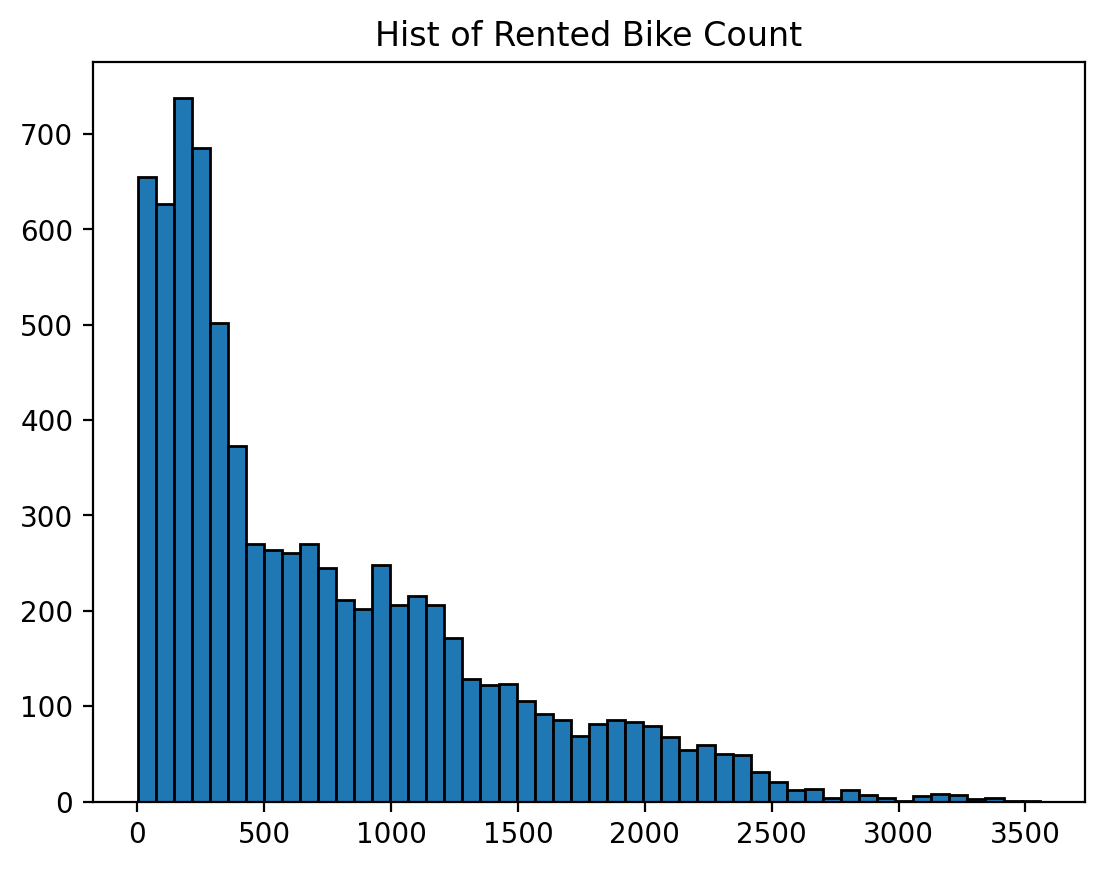

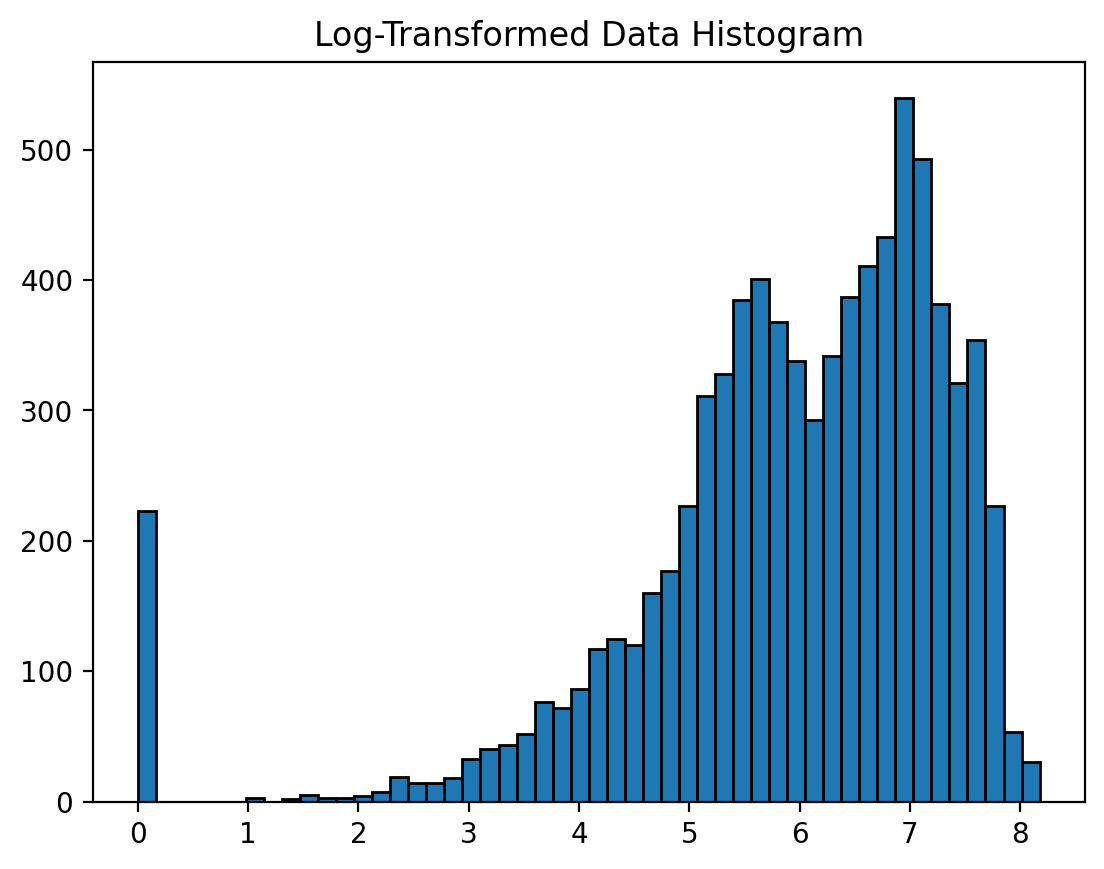

In [374]:
## 최종 train set 의 대여수 hist
plt.hist(df_train1_final['Rented Bike Count'], bins=50, edgecolor='black')
plt.title('Hist of Rented Bike Count')
plt.show()

## 최종 train set 의 대여수, 로그 변환 후 hist
log_trans_data = np.log1p(df_train1_final['Rented Bike Count']) 

plt.hist(log_transformed_data, bins=50, edgecolor='black')
plt.title('Log-Transformed Data Histogram')
plt.show() #이번엔 우측으로 치우친거같기도..

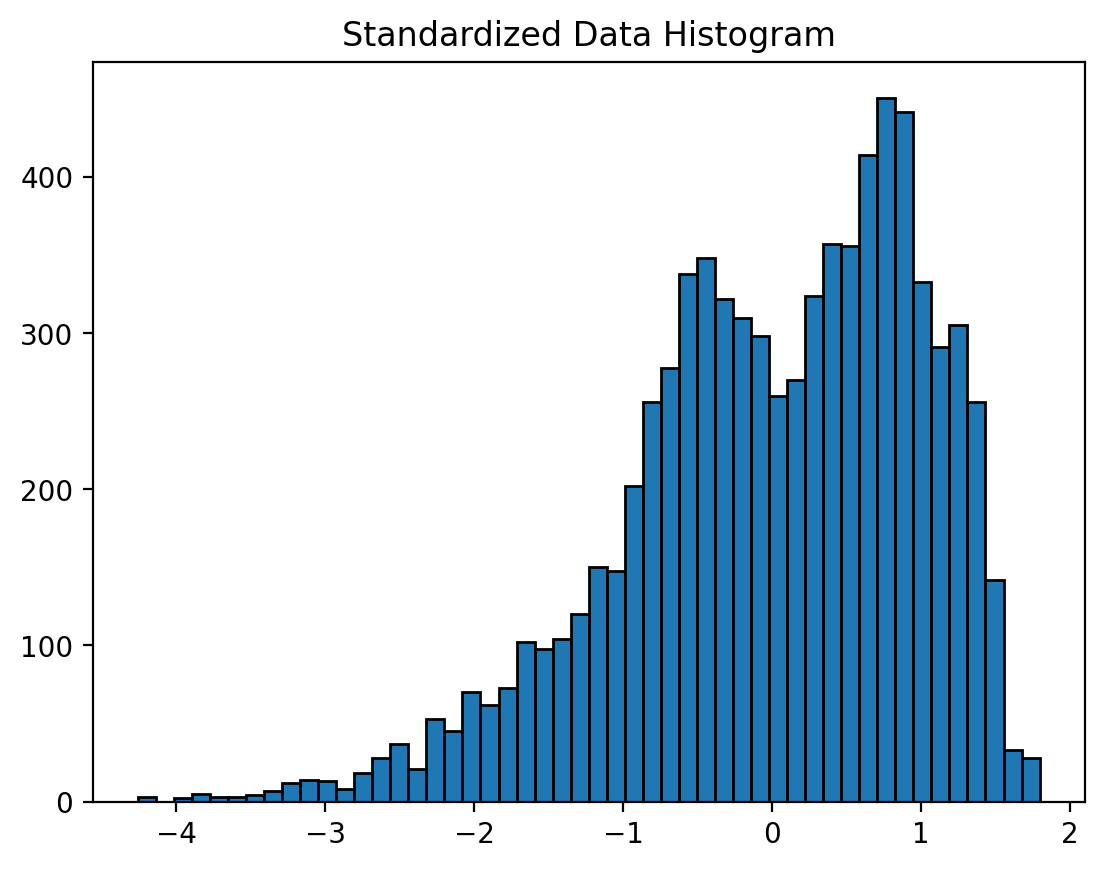

In [375]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터를 표준화하기 위해 scaler를 사용하여 fit 및 transform
standardized_data = scaler.fit_transform(log_trans_data.values.reshape(-1, 1))

# 표준화된 데이터를 히스토그램으로 표시
plt.hist(standardized_data, bins=50, edgecolor='black')
plt.title('Standardized Data Histogram')
plt.show()


### train, valid, test set 분리
- valid set 분리만 한번 해주면 됨
- 과제용 데이터에는 train, test set 이미 존재함

In [376]:
# X(독립변수), y(종속변수) 분리
from sklearn.model_selection import train_test_split

X = df_train1_final.drop('Rented Bike Count', axis=1)
y = df_train1_final['Rented Bike Count']

In [377]:
## 데이터셋 분리 후 차원확인
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(6253, 13) (1564, 13) (6253,) (1564,)


#### StandardScaler 
- Date 변수까지 제거해서 스케일링

In [378]:
#객체 생성
ss = StandardScaler()

#학습 및 변환
## fit 은 train에서만 
X_train_ss = ss.fit_transform(X_train)
X_val_ss = ss.transform(X_val)
#X_test_ss = ss.transform(X_test) #test셋이 있는 경우, titannic에서는 test셋이 이미 있음

## 각각 평균은 0, 분산은 1에 가까움
print("<train 셋>")
print(f'평균: {X_train_ss.mean()}\n분산: {X_train_ss.std()}')
print("<valid 셋>")
print(f'평균: {X_val_ss.mean()}\n분산: {X_val_ss.std()}')

<train 셋>
평균: 1.6607796847595497e-18
분산: 0.9607689228305227
<valid 셋>
평균: -0.007416026328488853
분산: 0.9440282916207472


### MaxAbs Scaler

In [379]:
#객체 생성
mms = MinMaxScaler()

#학습 및 변환
X_train_mms = mms.fit_transform(X_train)
X_val_mms = mms.transform(X_val)
#X_test_mms = mms.transform(X_test) #test셋이 있는 경우

print("<train 셋>")
print(f'최대: {X_train_mms.max()}\n최소: {X_train_mms.min()}')
print("<valid 셋>")
print(f'최대: {X_val_mms.max()}\n최소: {X_val_mms.min()}')

<train 셋>
최대: 1.0000000000000002
최소: 0.0
<valid 셋>
최대: 1.0
최소: -0.005272407732864692


### Min Max

In [382]:
#객체 생성
mas = MaxAbsScaler()

#학습 및 변환
X_train_mas = mas.fit_transform(X_train)
X_val_mas = mas.transform(X_val)
#X_test_mas = mas.transform(X_test) #test셋이 있는 경우

print("<train 셋>")
print(f'최대: {X_train_mas.max()}\n최소: {X_train_mas.min()}')
print("<valid 셋>")
print(f'최대: {X_val_mas.max()}\n최소: {X_val_mas.min()}')

<train 셋>
최대: 1.0
최소: -1.0
<valid 셋>
최대: 1.0
최소: -0.9705882352941175


### Robust Scaler

In [381]:
#객체 생성
rs = RobustScaler()

#학습 및 변환
X_train_rs = rs.fit_transform(X_train)
X_val_rs = rs.transform(X_val)
#X_test_rs = rs.transform(X_test) #test셋이 있는 경우

## 중앙값이랑 사분위값을 확인하는 것이 마즘,,,
print("<train 셋>")
print(f'평균: {X_train_rs.mean()}\n분산: {X_train_rs.std()}')
print("<valid 셋>")
print(f'평균: {X_val_rs.mean()}\n분산: {X_val_rs.std()}')

<train 셋>
평균: 0.08029906822577795
분산: 0.5711387000500548
<valid 셋>
평균: 0.07398744489307264
분산: 0.5287069372471598


In [385]:
## 이제 모델 돌릴때 이런식으로 하는건가..? 긴가민가 함 잘은 모르겠고 일단 이정도...?

# X(독립변수), y(종속변수) 분리
#X_test = df_test1_final  # 종속 변수가 없는 테스트 데이터셋


In [ ]:
# Train Dataset :
# 훈련 데이터셋에는 종속 변수(자전거 대여 수)와 독립 변수(예측에 사용되는 특성)이 모두 포함.
# 종속 변수와 독립 변수를 나누어야함. 종속 변수는 보통 따로 저장하거나 추출하여 관리.

# Test Dataset :
# 테스트 데이터셋에는 종속 변수가 없고, 예측해야 하는 값만 존재.
# 따라서, 테스트 데이터셋에서는 종속 변수를 제외한 독립 변수만 존재

In [388]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.feature_selection import SelectFromModel

# # 그라디언트 부스팅 모델 생성
# gb_model = GradientBoostingClassifier()

# # 모델 훈련
# gb_model.fit(X_train, y_train)

# # 특성 중요도 기반 선택
# selector = SelectFromModel(gb_model, threshold=0.1)  # 임계값 설정
# selector.fit(X_train, y_train)

# # 선택된 특성들을 사용하여 데이터 변환
# X_train_selected = selector.transform(X_train)
# X_test_selected = selector.transform(X_test)
